#  Lineare Algebra II - Vorlesung

**Themenüberblick:** 

- Rechenregeln der Matrizenrechnung: Transponieren, Matrixmultiplikation, Additon, Skalarmultiplikation, spezielle Matrizen
- lineare Funktionen: Inputraum -> Outputraum, Drehungen etc.
- lineare Gleichungssysteme: Geometrie, Formulierung als lineare Funktion(en) (Zeilen- und Spaltensicht), Lösungsstruktur (Eindeutigkeit und Existenz), inverse Matrix, Determinante, Rang, Berechnung am Computer und händisches Vorgehen
- Eigenwerte und -vektoren: evtl. als Programmierprojekt

**zusätzliche Unterlagen:** 

- `4_Lineare_Gleichungssysteme-scan.pdf`
- `5_Matrizenrechnung-scan.pdf`
- `6_Eigenwerte_und_Eigenvektoren-scan.pdf`

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Rechen mit Matrizen

**Visualisierung:**

- Zahl: Punkt
- Vektor: Strich, vertikal für Spaltenvektor, horizontal für Zeilenvektor
- Matrix: Rechteck

**Spalten- und Zeilenansicht von Matrizen:**

Eine Matrix kann auf folgende Arten gesehen werden:

- als Stapel von Zeilenvektor
- als Stapel von Spaltenvektor
- als 2-dimensionale Anordnung von Zahlen

**Zahlen und Vektoren als Matrizen:**

- Zahl:          $1\times 1$-Matrix
- Zeilenvektor:  $1\times n$-Matrix
- Spaltenvektor: $n\times 1$-Matrix

**Matrixprodukt:**

Das [Matrixprodukt](https://de.wikipedia.org/wiki/Matrizenmultiplikation) einer $n\times m$-Matrix mit einer $m\times p$-Matrix liefert eine $n\times p$-Matrix. Die innere Dimension muß übereinstimmen, hier ist sie $m$. Das Ergebnis hat die äußeren Dimensionen, hier $n$ und $p$. 
Pythonfunktion: `dot` oder `@`

Produkttypen:

- Zeilenvektor $\times$ Spaltenvektor = Zahl
- Matrix $\times$ Spaltenvektor = Spaltenvektor
- Zeilenvektor $\times$ Matrix = Zeilenvektor
- Matrix $\times$ Matrix = Matrix

**Weitere Rechenoperationen:**

- Addition Matrix $+$ Matrix: nur für Matrizen mit gleichen Dimensionen, elementweise
- Skalarmultiplikation Zahl $\cdot$ Matrix: elementweise
- Transponieren Matrix$^T$: Vertauschen der Spalten und Zeilen der Matrix, macht eine  $n\times m$-Matrix zu einer  $m\times n$-Matrix

**spezielle Matrizen:** 

- Nullmatrix: enthält lauter Nullen, Pythonfunktion: `zeros`, Notation $0$
- Einheitsmatrix: $n\times n$-Matrix (quadratisch), Einser auf der Diagonalen (=Elemente mit gleichem Zeilen- und Spaltenindex), ansonsten Nullen, Pythonfunktion: `eye`, Notation $I$ oder $\mathbb{1}$
- Inverse Matrix: Zu einer quadratischen Matrix $A$ kann (muss aber nicht) eine inverse Matrix, geschrieben als $A^{-1}$, existieren. Sie entspricht dem Kehrwert für Matrizen und hat die Eigenschaften: $A^{-1}A = I = AA^{-1}$. Pythonfunktion: `inv`

**Rechenregeln:**

Notation: Zahl $\alpha$, Matrizen $A$, $B$ und $C$

- $\alpha(A + B) = \alpha A + \alpha B$
- $\alpha(AB) = (\alpha A)B = A(\alpha B) = \alpha AB$
- $C(A + B) = CA + CB$
- $(A + B)C = AC + BC$
- $A(BC) = (AB)C = ABC$
- $(AB)^T = B^T A^T$ *Achtung:* Reihenfolge vertauscht!
- $(AB)^{-1} = B^{-1} A^{-1}$ *Achtung:* Reihenfolge vertauscht!
- $(A^{-1})^T = (A^T)^{-1} = A^{-T}$

*Achtung:* Im Allgemeinen ist $AB$ nicht gleich $BA$!

**Determinante:** 

Die Determinante ist eine Zahl, die nur für quadratische Matrizen (gleich viele Zeilen wie Spalten) berechnet werden kann. Notation $\det(A)$ und $\lvert A \rvert$, Pythonfunktion: `det`

*Beispiel:* $A=\begin{pmatrix} 3 & 2 \\ -1 & 4\end{pmatrix}$ hat die Determinante $\det(A) = 3\cdot 4 - (-1)\cdot 2 = 14$. Vergleiche die Berechnung des Kreuzproduktes von zwei räumlichen Vektoren.

*Geometrie:* Der Betrag der Determinante ist gleich dem Flächeninhalt (allg. dem Volumen) des von den Spaltenvektoren der Matrix aufgespannten Parallelepipeds.

*Formeln:*

- $2\times 2$-Matrizen: $\det(\begin{pmatrix} a & b \\ c & d\end{pmatrix}) = ad - cb$. Für eine $2\times 2$-Matrix $A=\begin{pmatrix} a & b \\ c & d\end{pmatrix}$ ist die inverse Matrix, falls $\det(A)\neq 0$, durch $A^{-1} = \frac{1}{\det(A)} \begin{pmatrix} d & -b \\ -c & a\end{pmatrix}$ gegeben.
- $3\times 3$-Matrizen: $\det\begin{pmatrix}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    a_{31} & a_{32} & a_{33}
    \end{pmatrix}= a_{11} a_{22} a_{33} +a_{12} a_{23} a_{31} + a_{13} a_{21} a_{32} - a_{13} a_{22} a_{31} - a_{12} a_{21} a_{33} - a_{11} a_{23} a_{32}$

*Rechenregeln:*

+ $\det(A)=0 \Leftrightarrow A^{-1}$ existiert nicht
+ $\det(A^T) = \det(A)$
+ $\det(AB) = \det(A)\det(B)$
+ $\det(I) = 1$
+ $\det(A^{-1}) = \det(A)^{-1}$

## Lineare Funktionen

**Definition:**

Eine lineare Funktion $f$ zwischen den Vektorräumen $\mathbb{R}^n \rightarrow \mathbb{R}^m$ ordnet jedem Inputvektor $x\in\mathbb{R}^n$ genau einen Outputvektor $f(x) \in\mathbb{R}^m$ auf eine Weise zu, sodass die Linearitätseigenschaft

$$f(\alpha x + \beta y) = \alpha f(x) + \beta f(y)$$

für alle Zahlen $\alpha$ und $\beta$ und alle Inputvektoren $x$ und $y$ erfüllt ist. 

**Eigenschaften:**

- Jede lineare Funktion läßt sich in Matrixform $f(x) = Ax$ für eine eindeutige $m\times n$-Matrix $A$ schreiben.
- Jede Funktion $f(x)$, die sich in Matrixform $f(x) = Ax$ schreiben läßt, ist linear.

**Beispiele:**

- Der Drehung in der Ebene um den Winkel $\alpha$ gegen den Uhrzeigersinn entspricht die Drehmatrix $R=\begin{pmatrix} \cos(\alpha) & -\sin(\alpha) \\ \sin(\alpha) & \cos(\alpha) \end{pmatrix}$.

- Der Spiegelung in der Ebene an der 1-Achse entspricht die Matrix $S=\begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}$.


**Darstellung des Outputs:**

- Der Outputvektor einer linearen Abblildung $Ax$ kann als Linearkombination der Spalten von $A$ dargestellt werden. Beispiel: $Ax= \begin{pmatrix} 1 & 2 \\ 3 & 4\end{pmatrix}\begin{pmatrix} x_1 \\ x_2\end{pmatrix} = x_1\begin{pmatrix} 1 \\ 3\end{pmatrix} + x_2\begin{pmatrix} 2 \\ 4\end{pmatrix}.$

- Der Outputvektor einer linearen Abblildung $Ax$ kann als Spaltenvektor der linearen Funktionen der Zeilenvektoren von $A$  dargestellt werden. Beispiel: $Ax= \begin{pmatrix} 1 & 2 \\ 3 & 4\end{pmatrix}\begin{pmatrix} x_1 \\ x_2\end{pmatrix} = \begin{pmatrix} 1x_1 + 2x_2 \\ 3x_1 + 4x_2\end{pmatrix}.$



**Hinereinanderausführung:**

Der Hintereinanderausführung von linearen Abbildungen $g\circ f$ entspricht das Matrixprodukt $BA$, wenn $f(x) = Ax$ und $g(y) = By$.

Beispiel: Drehen eines Punktes der Ebene zuerst um den Winkel $\alpha$ und anschließend Spiegeln an der 1-Achse entspricht dem Matrixprodukt $SR$. Achtung: Die andere Reihenfolge liefert nicht dasselbe!

## Lineare Gleichungssysteme

Jedes lineare Gleichungssystem mit $m$ Gleichungen und $n$ Variablen kann in der Matrixform $Ax=b$ geschrieben werden.

- $A$ die $m\times n$-Matrix der Koeffizienten
- $x$ der $n\times 1$-Spaltenvektor der Variablen
- $b$ der $m\times 1$-Spaltenvektor der rechten Seite der Gleichung

Ein Vektor $x$, der $Ax=b$ erfüllt, ist eine Lösung des lineare Gleichungssystems. Ein Lösung ist somit ein Input der linearen Funktion $Ax$, der den Output $b$ hat.

**Formtypen:**

Ein Gleichungssystem ist von einem der drei folgenden Formtypen:

- quadratisch:   $m = n$, d. h. gleich viele Gleichungen wie Variablen
- überbestimmt:  $m > n$, d. h. mehr Gleichungen als Variablen
- unterbestimmt: $m < n$, d. h. weniger Gleichungen als Variablen

**Geometrie:**

Jede Gleichung des Gleichungssystems ist die Konturlinie einer linearen Funktion und entspricht daher einer Hyperebene im Variablenvektorraum $\mathbb{R}^n$.
Die Lösungsmenge des Gleichungssystems ist die Schnittmenge der Hyperebenen.

*Beispiel:* Das Gleichungssystem

$$\begin{pmatrix} 2 & 3 \\ -1 & 5\end{pmatrix}\begin{pmatrix} x_1 \\x_2\end{pmatrix} = \begin{pmatrix} 8 \\ 4\end{pmatrix}$$ 

besteht aus den zwei Gleichungen 

$$\begin{align} 
2x_1 + 3x_2 & = 8 \\
-x_1 + 5x_2 & = 4
\end{align}$$

Die erste Gleichung ist die Konturlinie zur linearen Funktion $(2, 3)\begin{pmatrix} x_1 \\x_2\end{pmatrix}$  zum Wert 8. Die zweite Gleichung ist die Konturlinie zur linearen Funktion $(-1, 5)\begin{pmatrix} x_1 \\x_2\end{pmatrix}$ zum Wert 4. Beide Konturlinien sind Geraden in der $(x_1, x_2)$-Ebene.

**Lösungsstruktur:**

Ein Gleichungssystem hat entweder keine, eine oder unendlich viele Lösungen. 

*Beispiel (Fortsetzung):* Zwei Geraden in der Ebene können keinen (parallele Geraden), einen oder unendlich viele (übereinanderliegende Geraden) Schnittpunkte haben. 

*Achtung:* Aus dem Formtyp läßt sich die Lösungsstruktur nicht folgern!

**Lösungsmethoden und -kriterien:**

Für alle Gleichungssysteme $Ax=b$:

*Gaußsches Eliminationsverfahren:* geschickte Kombination von Äquivalenzumformungen des Gleichungssystems, d. h. Multiplizieren (außer mit Null), Vertauschen und Addieren von Gleichungen, liefert die Lösungsmenge, die leer ist, falls keine Lösung existiert.

Der *Rang* einer Matrix $A$ ist die Anzahl linear unabhängiger Spalten- oder Zeilenvektoren der Matrix. Notation: $\text{Rang}(A).$ Pythonfunktion: `matrix_rank`. Ein Gleichungssystem $Ax=b$ habe eine $m\times n$-Koeffizientenmatrix $A$ mit Rang $r$, der sicher kleiner gleich $m$ und $n$ ist. Dann gilt:

- (A) Falls $r=m$,   dann existiert mindestens eine Lösung.
- (B) Falls $r=n$,   dann ist eine Lösung eindeutig. 
- (C) Falls $r=m=n$, dann existiert genau eine Lösung.

$(A|b)$ bezeichne die mit der zusätzlichen Spalte $b$ erweiterte Koeffizientenmatrix. Dann gilt:

- (D) $Ax=b$ ist genau dann lösbar, wenn $\text{Rang}(A) = \text{Rang}(A|b)$.
- (E) $Ax=b$ hat eine eindeutige Lösung, wenn $\text{Rang}(A) = \text{Rang}(A|b) = n$.
- (F) $Ax=b$ hat unendlich viele Lösungen, wenn $\text{Rang}(A) = \text{Rang}(A|b) < n$.

Pythonfunktion: Die Funktion `lstsq` liefert eine Lösung, falls mindestens eine Lösung existiert. Falls keine Lösung existiert, liefert `lstsq` keine Lösung sondern die Least-Squares-Approximation! Mehr dazu im Abschnitt Regression.
    
Nur für *quadratische Gleichungssysteme* $Ax=b$, d. h. mit quadratischer Koeffizientenmatrix $A$:

- Falls die inverse Matrix $A^{-1}$ existiert, liefert die Multiplikation von $Ax=b$ von links mit $A^{-1}$ die eindeutige Lösung $x=A^{-1}b$. Die inverse Matrix von $A$ existiert genau dann, wenn die Determinante von $A$ nicht Null ist. Falls $A^{-1}$ nicht existiert, also $\det(A)=0$, dann gibt es ein $\tilde{b}$, sodass $Ax=\tilde{b}$ keine Lösung hat, und falls eine Lösung zu $Ax=b$ existiert, dann ist sie nicht eindeutig.
- Pythonfunktion: Für quadratische Gleichungssysteme liefert `solve`, falls $\det(A)\neq0$, die eindeutige Lösung, andernfalls eine Fehlermeldung.

Beweis für (A): Da $A$ soviele linear unabhängige Spalten hat, wie der Outputraum der linearen Abbildung $Ax$ Dimensionen hat, spannen diese und somit alle Spalten den Outputraum auf, d. h. jeder Vektor des Outputraums, also auch $b$, ist eine Linearkombination der Spalten von $A$. Der Vektor $x$ der Koeffizienten dieser Linearkombination erfüllt daher $Ax=b$.

Beweis für (B): Angenommen es gäbe zwei unterschiedliche Lösungen $x$ und $y$, also sowohl  $Ax=b$ und $Ay=b$ gelten. Subtrahieren dieser beiden Matrixgleichungen liefert $Ax-Ab=0$ und $A(x-y)=0$. Da die Spalten von $A$ linear unabhängig sind, hat $A(x-y)=0$ nur die triviale Lösung $x-y=0$, also $x=y$.

## Eigenwerte und -vektoren

**Motivation:**

Der Effekt einer linearen Abbildung, also die Multiplikation eines Vektors $x$ mit einer Matrix $A$, ist im Allgemeinen unübersichtlich, d. h. der Output $Ax$ hängt vom Input auf eine komplizierte Weise ab. Wäre der Effekt eine reine Skalarmultiplikation $\lambda x$, so wäre der Output eine Umsaklierung (Streckung, Stauchung, Umkehrung) des Inputs $x$ und deutlich einfacher zu handhaben.

**Anwendungen:**

- Entkoppeln von Gleichungen: Dynamische Systeme, Differentialgleichungen (-> Eigenfrequenzen, etc.)
- Nicht-lineare Optimierung: Kriterium für lokales Maximum bzw. Minimum
- Hauptachsentransformation, Principal Component Analysis
- PageRank-Algorithmus von Google
- Quantenmechanik
- etc.

**Definition:**

Ein Eigenvektor einer quadratischen Matrix $A$ ist ein nicht-Null-Vektor $x$, sodass

$$Ax = \lambda x$$

für eine Zahl $\lambda$ gilt. Die Zahl $\lambda$ ist der Eigenwert von $A$ zum Eigenvektor $x$.

*Achtung:* Jedes Vielfache eines Eigenvektors ist wieder Eigenvektor zum selben Eigenwert: $A(\alpha x) = \alpha Ax = \alpha \lambda x = \lambda (\alpha x)$.

**Berechnung:**

Falls $x$ ein Eigenvektor von $A$ zum Eigenwert $\lambda$ ist, dann gelten:

$$\begin{align}
Ax                & = \lambda x \\
Ax - \lambda x    & = 0 \\
Ax - \lambda I x  & = 0 \\
(A - \lambda I) x & = 0.
\end{align}$$

Da $x$ laut Annahme ein nicht-Null-Vektor ist, hat das letzte Gleichungssystem neben der trivialen Lösung des Nullvektors mit $x$ eine zweite und somit nicht eindeutige Lösung. Daher muss die Determinante der Koeffizientenmatrix Null sein: 

$$\det(A - \lambda I) = 0.$$

Andernfalls hätte das letzte Gleichungssystem eine eindeutige Lösung.
Aus der Bedingung $\det(A - \lambda I) = 0$ lassen sich alle Eigenwerte berechnen. Anschließend kann zu jedem Eigenwert $\lambda$ ein Eigenvektor berechnet werden, indem eine nicht-triviale Lösung von $(A - \lambda) x = 0$ bestimmt wird.

Pythonfunktion: `eig`

## Beispiele

**Lineare Abbildung - Drehung:**

Drehen eines Vektors, der als Pfeil interpretiert wird:

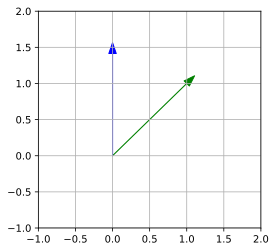

In [2]:
alpha = pi/4  # 45°
R = array([[cos(alpha), -sin(alpha)],
           [sin(alpha),  cos(alpha)]])
x = array([1, 1])
y = dot(R, x)

figure(figsize=(4,4))
arrow(0, 0, x[0], x[1], head_width=.1, color='green')
arrow(0, 0, y[0], y[1], head_width=.1, color='blue')
xlim(-1,2)
ylim(-1,2)
grid(True)

Drehen vieler Vektoren, die als Punkte interpretiert werden:

In [3]:
# Matrix der Eckpunkte einer Fläche, Eckpunkte als Spaltenvektoren der Matrix:
ecken_orig = array([[0, 1, 2, 1,-1],
                    [0,-1, 1, 2, 2]])
ecken_dreh = dot(R, ecken_orig)

fig = figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.add_patch(Polygon(ecken_orig.T, closed=True, color='green', alpha=0.3))
ax.add_patch(Polygon(ecken_dreh.T, closed=True, color='blue', alpha=0.3))
xlim(-2,3)
ylim(-2,3)
grid(True)

**Lösungsstruktur von Gleichungssystemen:**

Rang: unendlich viele Lösungen

In [4]:
# Fallbeispiel: Ax = b hat unendlich viele Lösungen:

A = array([[ 1,-3, 1],
           [-2, 0, 5]])
b = array([[ 0],
           [-7]])
Ab = hstack((A, b))
print("Rang von A  =", matrix_rank(A))
print("Rang von Ab =", matrix_rank(Ab))
print("Anzahl der Variablen =", shape(A)[1])

# eine Lösung erhält man mit lstsq:
x = lstsq(A, b, rcond=None)[0]
print("eine Lösung ist x = \n{}".format(x))

# Check, dass x eine Lösung ist
print("Ax - b =\n", A@x - b)

# alle Lösungen erhält man aus x + beliebige Linearkombination der Spalten von N:
U, S, Vs = svd(A)
r = matrix_rank(A)
N = Vs[r:].conj().T
# Check, dass die Spalten von N mit A multipliziert Null ergeben:
print("AN =\n", A@N)

Rang von A  = 2
Rang von Ab = 2
Anzahl der Variablen = 3
eine Lösung ist x = 
[[ 0.56451613]
 [-0.20322581]
 [-1.17419355]]
Ax - b =
 [[ 2.22044605e-16]
 [-1.77635684e-15]]
AN =
 [[3.33066907e-16]
 [4.44089210e-16]]


Rang: keine Lösung

In [5]:
# Fallbeispiel: Ax = b hat keine Lösung:

A = array([[ 1,-3],
           [-2, 0],
           [ 5, 1]])
b = array([[ 0],
           [-7],
           [ 1]])
Ab = hstack((A, b))
print("Rang von A  =", matrix_rank(A))
print("Rang von Ab =", matrix_rank(Ab))
print("Anzahl der Variablen =", shape(A)[1])

# Achtung : Das mit lstsq berechnete x ist keine Lösung!
x = lstsq(A, b, rcond=None)[0]
print("lstsq liefert x = \n{}".format(x))
print("Ax - b =\n", A@x - b)

Rang von A  = 2
Rang von Ab = 3
Anzahl der Variablen = 2
lstsq liefert x = 
[[ 0.63513514]
 [-0.02702703]]
Ax - b =
 [[0.71621622]
 [5.72972973]
 [2.14864865]]


Rang: genau eine Lösung

In [6]:
# Fallbeispiel: Ax = b hat eine eindeutige Lösung. Diese kann mit lstsq berechnet werden:

A = array([[ 1,-3],
           [-2, 0],
           [ 5, 1]])
b = array([[ 4],
           [-2],
           [ 4]])
Ab = hstack((A, b))
print("Rang von A  =", matrix_rank(A))
print("Rang von Ab =", matrix_rank(Ab))
print("Anzahl der Variablen =", shape(A)[1])

if matrix_rank(A) == matrix_rank(Ab) and matrix_rank(A) == shape(A)[1]:
    x = lstsq(A, b, rcond=None)[0]
    print("eindeutige Lösung ist x = \n{}".format(x))
    # Check, dass x eine Lösung ist
    print("Ax - b =\n", A@x - b)

Rang von A  = 2
Rang von Ab = 2
Anzahl der Variablen = 2
eindeutige Lösung ist x = 
[[ 1.]
 [-1.]]
Ax - b =
 [[-3.10862447e-15]
 [ 2.22044605e-16]
 [ 0.00000000e+00]]


Determinante, inverse Matrix: Determinante nicht Null, genau eine Lösung

In [7]:
 # eindeutige Lösung existiert

A = array([[ 1, 0],
          [ 2, 3]])
b = array([[ 1],
           [-3]]) 
print("Determinante von A = {:.2f}".format(det(A)))
print("Rückgabe von solve(A,b):\n", solve(A,b))
print("Rückgabe von inv(A):\n", inv(A))

Determinante von A = 3.00
Rückgabe von solve(A,b):
 [[ 1.        ]
 [-1.66666667]]
Rückgabe von inv(A):
 [[ 1.          0.        ]
 [-0.66666667  0.33333333]]


Determinante, inverse Matrix: Determinante Null, keine oder unendlich viele Lösungen

In [8]:
# Determinante Null, solve liefert Fehlermeldung `LinAlgError: Singular matrix`

A = array([[ 1, -2],
           [-2,  4]])
b = array([[ 1],
           [-3]]) 
print("Determinante von A =", det(A))

# print("Rückgabe von solve(A,b):\n", solve(A,b))
# print("Rückgabe von inv(A):\n", inv(A))

Determinante von A = 0.0


**Eigenwerte und -vektoren:**

Für $A=\begin{pmatrix} 0.8 & 0.3 \\ 0.2 & 0.7 \end{pmatrix}$ liefert die Bedingung $\det(A - \lambda I) = 0$ die quadratische Gleichung $\lambda^2 - 1.5\lambda + 0.5=0$. Deren Lösungen $\lambda_1=1$ und $\lambda_2=\frac{1}{2}$ sind die Eigenwerte von $A$.

- Die Eigenvektoren zum Eigenwert $\lambda_1$ sind die Lösungen von $(A - \lambda_1 I)x = 0$, in unserem Beispiel ist das $\begin{pmatrix} -0.2 & 0.3 \\ 0.2 & -0.3 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$. Die Eigenvektoren sind alle Vielfachen von z. B. $\begin{pmatrix} 3 \\ 2 \end{pmatrix}$.
- Die Eigenvektoren zum Eigenwert $\lambda_2$ sind die Lösungen von $(A - \lambda_2 I)x = 0$, in unserem Beispiel ist das $\begin{pmatrix} 0.3 & 0.3 \\ 0.2 & 0.2 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$. Die Eigenvektoren sind alle Vielfachen von z. B. $\begin{pmatrix} 1 \\ -1 \end{pmatrix}$.

In [9]:
A = array([[0.8, 0.3],
           [0.2, 0.7]])
L, V = eig(A)
print("Eigenwerte:\n",    L)
print("Eigenvektoren:\n", V)

Eigenwerte:
 [1.  0.5]
Eigenvektoren:
 [[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]
